In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score, roc_auc_score, roc_curve)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
df = pd.read_csv('data/fifa_players_preprocessed.csv')
df.head()

,name,age,height_cm,weight_kg,nationality,club_name,league_name,overall,potential,value_eur,...,work_rate_Low/High,work_rate_Low/Low,work_rate_Low/Medium,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium,age_group_21-25,age_group_26-30,age_group_31-35,age_group_36+
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,93,93,67500000,...,False,False,False,False,True,False,False,False,True,False
1,Cristiano Ronaldo,35,187,83,Portugal,Juventus,Italian Serie A,92,92,46000000,...,False,False,False,False,False,False,False,False,True,False
2,R. Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,91,91,80000000,...,False,False,False,False,False,False,False,False,True,False
3,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,91,91,90000000,...,False,False,False,False,False,False,False,True,False,False
4,K. De Bruyne,29,181,70,Belgium,Manchester City,English Premier League,91,91,87000000,...,False,False,False,False,False,False,False,True,False,False


In [25]:
df.columns

Index(['name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club_name',
       'league_name', 'overall', 'potential', 'value_eur', 'wage_eur',
       'player_positions', 'weak_foot', 'skill_moves', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'high_value',
       'height_weight_ratio', 'primary_position', 'primary_position_enc',
       'preferred_foot_Right', 'work_rate_High/Low', 'work_rate_High/Medium',
       'work_rate_Low/High', 'work_rate_Low/Low', 'work_rate_Low/Medium',
       'work_rate_Medium/High', 'work_rate_Medium/Low',
       'work_rate_Medium/Medium', 'age_group_21-25', 'age_group_26-30',
       'age_group_31-35', 'age_group_36+'],
      dtype='object')

In [26]:
df.shape

(16666, 37)

In [27]:
print(df.head())

                name  age  height_cm  weight_kg nationality  \
0           L. Messi   33        170         72   Argentina   
1  Cristiano Ronaldo   35        187         83    Portugal   
2     R. Lewandowski   31        184         80      Poland   
3          Neymar Jr   28        175         68      Brazil   
4       K. De Bruyne   29        181         70     Belgium   

             club_name             league_name  overall  potential  value_eur  \
0         FC Barcelona  Spain Primera Division       93         93   67500000   
1             Juventus         Italian Serie A       92         92   46000000   
2    FC Bayern München    German 1. Bundesliga       91         91   80000000   
3  Paris Saint-Germain          French Ligue 1       91         91   90000000   
4      Manchester City  English Premier League       91         91   87000000   

   ...  work_rate_Low/High work_rate_Low/Low  work_rate_Low/Medium  \
0  ...               False             False                 Fal

In [28]:
n_features = [
    'overall', 'height_cm','weight_kg','weak_foot','skill_moves',
    'pace','shooting','passing','dribbling','defending','physic',
    'potential','height_weight_ratio','primary_position_enc'
]

In [29]:
c_features = [col for col in df.columns if col.startswith("work_rate_") or col.startswith("preferred_foot_") or col.startswith("age_group_")]

In [30]:
features = n_features + c_features
X = df[features]
y_reg = df["value_eur"]
y_clf = df["high_value"]
y_reg_log = np.log1p(y_reg)
scaler = StandardScaler()
X[n_features] = scaler.fit_transform(X[n_features])

C:\Users\user\AppData\Local\Temp\ipykernel_34848\2458719386.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[n_features] = scaler.fit_transform(X[n_features])


In [31]:
X_train, X_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(
    X, y_reg_log, y_clf, test_size=0.2, random_state=42
)

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_reg_train)

y_reg_pred = np.expm1(lin_reg.predict(X_test))

In [33]:
MAE = mean_absolute_error(np.expm1(y_reg_test), y_reg_pred)
MSE = mean_squared_error(np.expm1(y_reg_test), y_reg_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(np.expm1(y_reg_test), y_reg_pred)

print("Linear Regression Results:")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R2:", R2)


Linear Regression Results:
MAE: 451260.2474234821
MSE: 7928867937795.238
RMSE: 2815824.557353536
R2: 0.7505216753877632


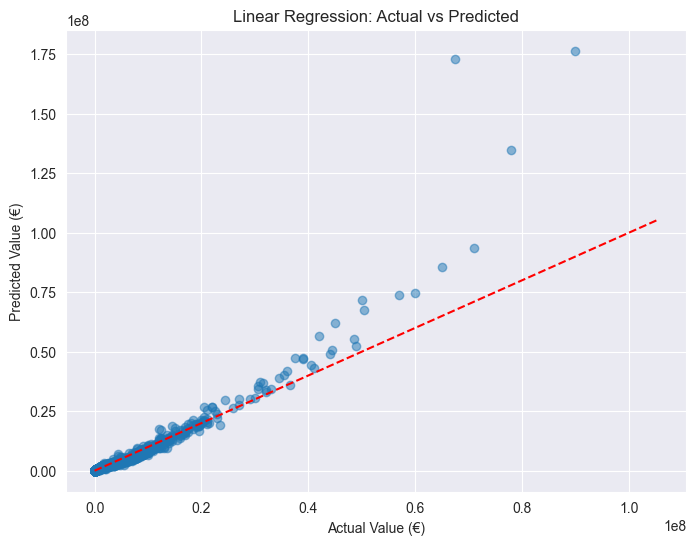

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(np.expm1(y_reg_test), y_reg_pred, alpha=0.5)
plt.plot([0, df['value_eur'].max()], [0, df['value_eur'].max()], '--', color='red')
plt.xlabel("Actual Value (€)")
plt.ylabel("Predicted Value (€)")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


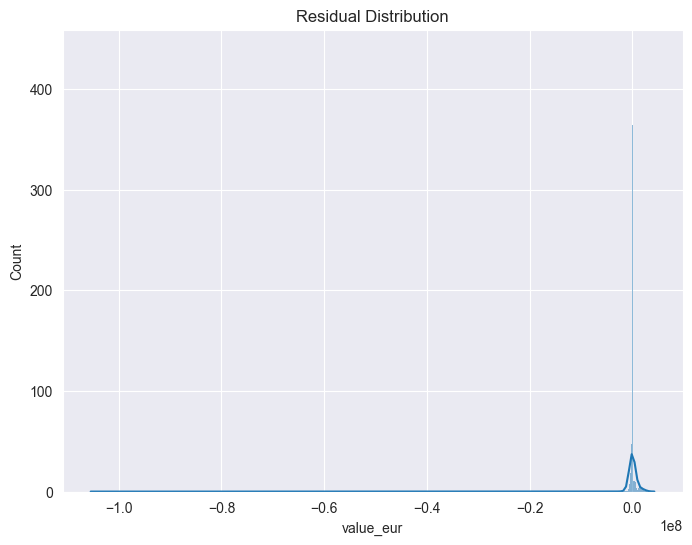

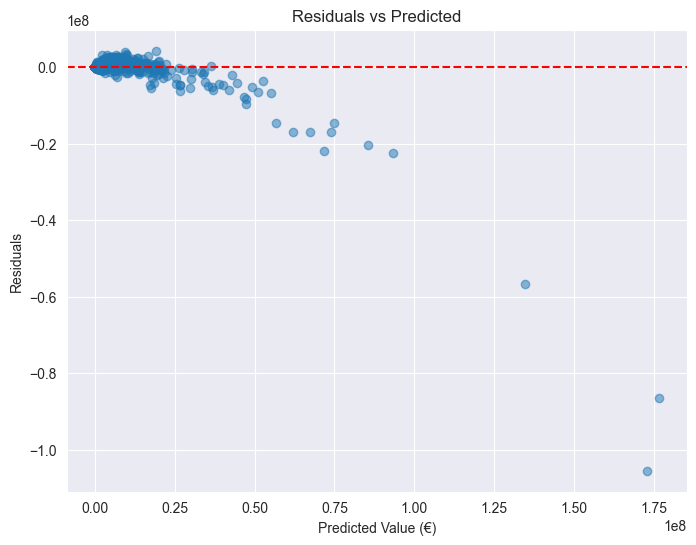

In [35]:
residuals = np.expm1(y_reg_test) - y_reg_pred

plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(y_reg_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Value (€)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


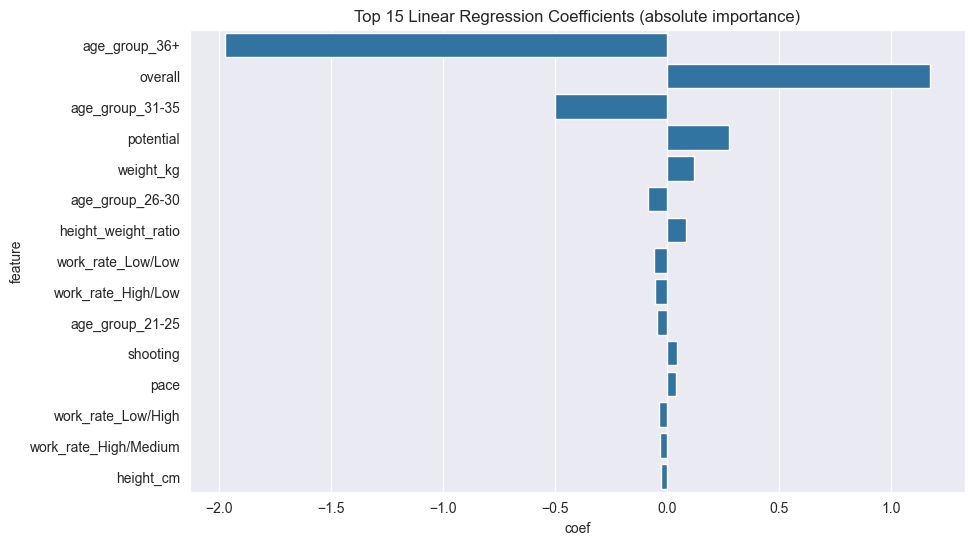

In [36]:
coeffs = pd.DataFrame({
    "feature": X.columns,
    "coef": lin_reg.coef_
}).sort_values("coef", key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=coeffs.head(15), x="coef", y="feature")
plt.title("Top 15 Linear Regression Coefficients (absolute importance)")
plt.show()


In [37]:
pd.set_option('display.float_format', '{:,.2f}'.format)
df_reg_pred = pd.DataFrame({
    "actual_value_eur": np.expm1(y_reg_test),
    "predicted_value_eur": y_reg_pred
})
df_reg_pred

,actual_value_eur,predicted_value_eur
1261,"7,000,000.00","6,495,043.45"
5848,"1,100,000.00","1,407,391.66"
1799,"9,000,000.00","7,321,327.02"
4048,"2,900,000.00","3,283,009.74"
5504,"1,000,000.00","1,332,936.05"
...,...,...
9602,"1,000,000.00","1,070,401.51"
14749,"130,000.00","126,519.85"
2548,"2,900,000.00","2,000,461.11"
13374,"325,000.00","313,675.24"


========================================================================

Logistic Regression Results:
Accuracy: 0.9793041391721655
Precision: 0.9835680751173709
Recall: 0.9761211415259173
F1 Score: 0.9798304589301374


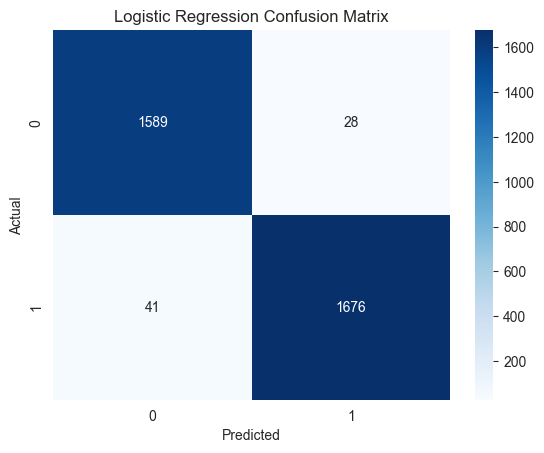

In [38]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_clf_train)

y_clf_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_clf_test, y_clf_pred)
precision = precision_score(y_clf_test, y_clf_pred)
recall = recall_score(y_clf_test, y_clf_pred)
f1 = f1_score(y_clf_test, y_clf_pred)

print("Logistic Regression Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

cm = confusion_matrix(y_clf_test, y_clf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


In [39]:
coef_df = pd.DataFrame({
    "feature": X.columns,
    "coef": log_reg.coef_[0]
}).sort_values("coef", key=abs, ascending=False)

print(coef_df.head(15))


                 feature  coef
0                overall 13.23
26         age_group_36+ -9.07
25       age_group_31-35 -5.11
11             potential  4.38
23       age_group_21-25  1.01
9              defending -0.75
24       age_group_26-30  0.71
15    work_rate_High/Low -0.46
21  work_rate_Medium/Low -0.35
6               shooting  0.33
10                physic  0.30
14  preferred_foot_Right  0.29
5                   pace  0.27
18     work_rate_Low/Low  0.25
13  primary_position_enc -0.24


In [40]:
df_clf_pred = pd.DataFrame({
    "actual_high_value": y_clf_test,
    "predicted_high_value": y_clf_pred,
    "predicted_prob": log_reg.predict_proba(X_test)[:,1]
})
df_clf_pred

,actual_high_value,predicted_high_value,predicted_prob
1261,1,1,1.00
5848,1,1,1.00
1799,1,1,1.00
4048,1,1,1.00
5504,1,1,1.00
...,...,...,...
9602,1,1,0.99
14749,0,0,0.00
2548,1,1,1.00
13374,0,0,0.00


In [41]:
import pickle

In [42]:
with open('models/model_linear', 'wb') as f:
    pickle.dump(lin_reg, f)
with open('models/model_logistic', 'wb') as f:
    pickle.dump(log_reg, f)